In [75]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [46]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [47]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower())
data.columns = cols

In [48]:
data.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
customer lifetime value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective to date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
income,56274,0,48767,0,43836


In [49]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [50]:
data.drop_duplicates()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [51]:
categorical = data.select_dtypes('object')

In [52]:
numerical = data._get_numeric_data()

In [53]:
numerical.head().T

,0,1,2,3,4
customer lifetime value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
income,56274.000000,0.000000,48767.000000,0.000000,43836.000000
monthly premium auto,69.000000,94.000000,108.000000,106.000000,73.000000
months since last claim,32.000000,13.000000,18.000000,18.000000,12.000000
months since policy inception,5.000000,42.000000,38.000000,65.000000,44.000000
number of open complaints,0.000000,0.000000,0.000000,0.000000,0.000000
number of policies,1.000000,8.000000,2.000000,7.000000,1.000000
total claim amount,384.811147,1131.464935,566.472247,529.881344,138.130879


In [54]:
categorical.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective to date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
location code,Suburban,Suburban,Suburban,Suburban,Rural
marital status,Married,Single,Married,Married,Single


In [55]:
categorical.drop(['customer','effective to date', 'response', 'vehicle size','policy' ],axis = 1,inplace = True)

In [56]:
numerical.drop(['number of open complaints'],axis= 1, inplace=True)

In [60]:
numerical['income'] = numerical['income'].replace(0, numerical['income'].mean())

In [25]:
from sklearn.preprocessing import LabelEncoder

In [61]:
for col in categorical.columns:
    categorical[col]=LabelEncoder().fit(categorical[col]).transform(categorical[col])

In [62]:
new = pd.concat([numerical, categorical], axis=1)

In [64]:
new.head().T

,0,1,2,3,4
customer lifetime value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
income,56274.000000,37657.380009,48767.000000,37657.380009,43836.000000
monthly premium auto,69.000000,94.000000,108.000000,106.000000,73.000000
months since last claim,32.000000,13.000000,18.000000,18.000000,12.000000
months since policy inception,5.000000,42.000000,38.000000,65.000000,44.000000
number of policies,1.000000,8.000000,2.000000,7.000000,1.000000
total claim amount,384.811147,1131.464935,566.472247,529.881344,138.130879
state,4.000000,0.000000,2.000000,1.000000,4.000000
coverage,0.000000,1.000000,2.000000,0.000000,0.000000
education,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
X = new.drop(['total claim amount'],axis = 1)
Y = new['total claim amount']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [67]:
model = sm.OLS(y_train, X_train).fit()

In [68]:
predictions = model.predict(X_test)

In [69]:
r2_score(y_test, predictions)

0.5607945973516342

In [79]:
Y.describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total claim amount, dtype: float64

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(mse)

34896.145498162456


In [71]:
import math
rmse = math.sqrt(mse)
print(rmse)

186.80510030018576


In [72]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
print (mae)

137.49863676370515


In [77]:
corr_matrix = np.corrcoef(y_test, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.5633640307264574


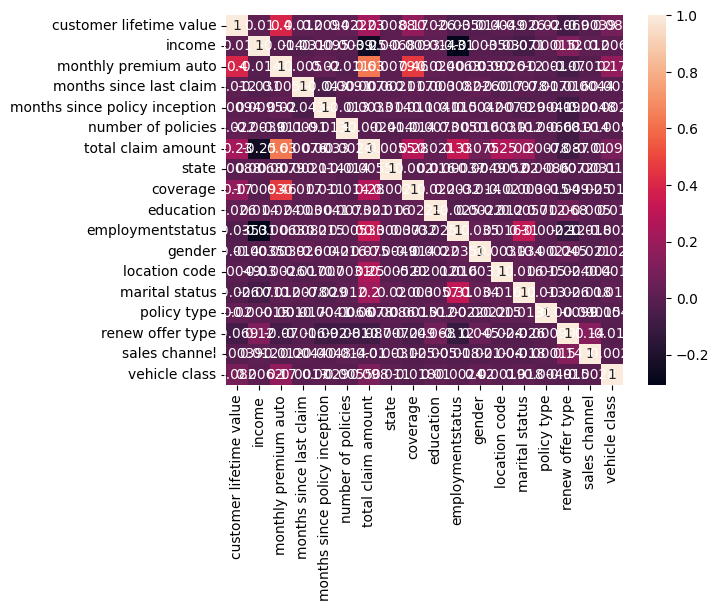

In [80]:
sns.heatmap(new.corr(), annot = True)
plt.show()

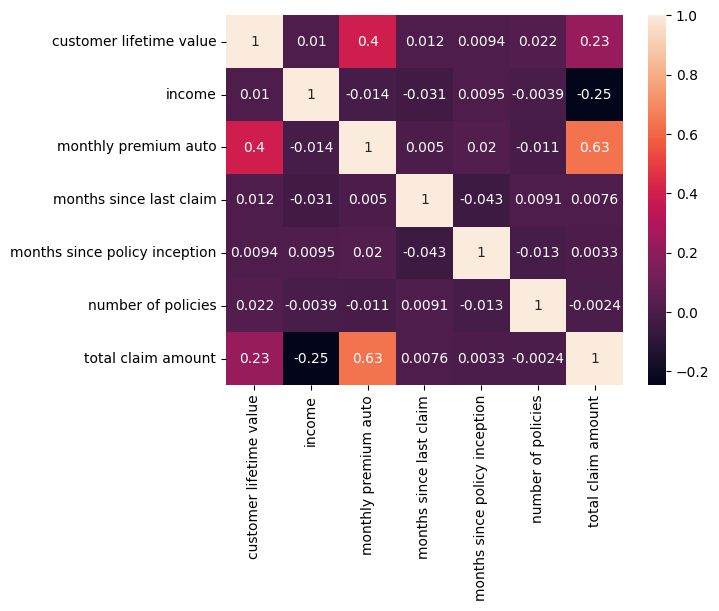

In [82]:
sns.heatmap(numerical.corr(), annot = True)
plt.show()

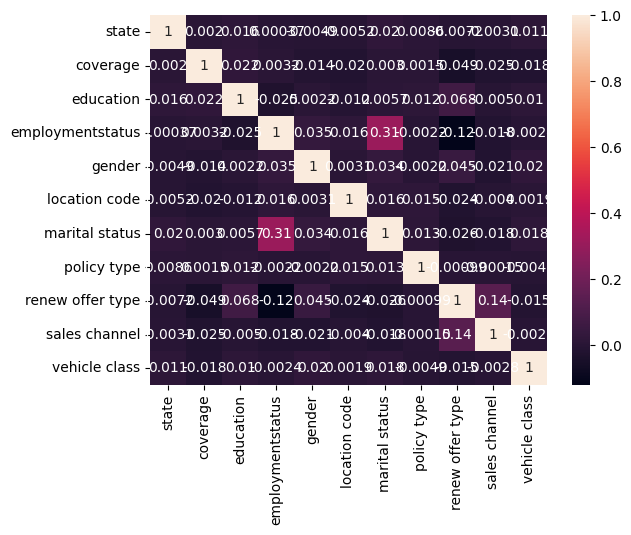

In [83]:
sns.heatmap(categorical.corr(), annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

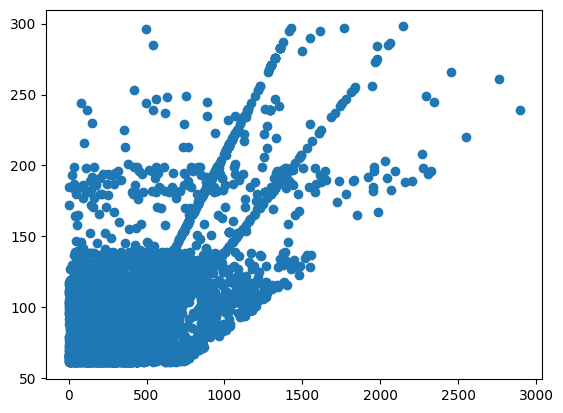

In [84]:
plt.scatter(new['total claim amount'],new['monthly premium auto'])
plt.show 